In [12]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from ModelMethods import *
from tqdm import tqdm

# Data Preparation

In [16]:
move_data = pd.read_csv('data/move_data.csv', index_col=0)
move_data['move_time'] = pd.to_datetime(move_data['move_time'])
move_data['leave_time'] = pd.to_datetime(move_data['leave_time'])

In [17]:
# drop data with ins_id = prev_ins and recalculate stay time
move_data = move_data[move_data['institution_id'] != move_data['prev_ins']]
move_data.loc[:, 'leave_time'] = move_data.groupby('author_id')['move_time'].shift(-1)
move_data.loc[:, 'stay_time'] = move_data['leave_time'] - move_data['move_time']
move_data

,work_id,author_id,institution_id,move_time,next_work,next_ins,prev_ins,prev_work,leave_time,stay_time
334318281,W2119512358,A5000000072,I153718931,2015-01-01,W2698937230,I153718931,NaN,NaN,2019-01-01,1461 days 00:00:00
102025449,W2980455904,A5000000072,I198243066,2019-01-01,W2937736128,I198243066,I153718931,W2698937230,NaT,NaT
575636339,W1974959902,A5000000092,I131249849,1989-05-01,W1931087167,I74760111,NaN,NaN,2002-11-23,4954 days 00:00:00
435973848,W1931087167,A5000000092,I74760111,2002-11-23,W2074136998,I74760111,I131249849,W1974959902,2014-01-01,4057 days 00:00:00
89820042,W1969045824,A5000000092,I16076960,2014-01-01,W2339833875,I16076960,I74760111,W2040021470,2020-10-11,2475 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...
721320695,W2018828353,A5098902049,I219193219,1981-01-01,W2037146473,I219193219,NaN,NaN,NaT,NaT
734669562,W2315862073,A5098902050,I111236770,1995-09-01,W1970859623,I111236770,NaN,NaN,NaT,NaT
412469905,W4385888121,A9999999999,I1290463931,1973-10-01,W4242537482,I4210140884,NaN,W4239162299,1990-05-01,6056 days 00:00:00
455943907,W4300935765,A9999999999,I142740786,1990-05-01,W4246209584,I129975664,I1290463931,W4300032867,2024-03-25,12382 days 00:00:00


In [18]:
target_ins = move_data['next_ins'].value_counts()
target_ins

next_ins
I74801974      27496
I27837315      26586
I97018004      26259
I17974374      24754
I136199984     23689
               ...  
I4210137612        1
I4210100495        1
I4210150030        1
I4210126034        1
I3131198051        1
Name: count, Length: 63769, dtype: int64

/opt/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

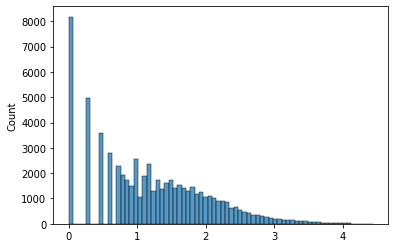

In [19]:
sns.histplot(np.log10(target_ins.values))

In [20]:
with open('data/institution_geo24.pkl', 'rb') as f:
    institution_geo = pickle.load(f)
institution_geo

,institution_id,city,region,country_code,country,latitude,longitude
0,I220871436,NaN,NaN,FR,NaN,48.848610,2.342780
1,I4210140407,Portland,Oregon,US,United States,45.525047,-122.672940
2,I4210121796,London,NaN,GB,United Kingdom,51.544495,-0.056045
3,I2800206933,Vienna,NaN,AT,Austria,48.204475,16.357422
4,I2802204158,Salem,Oregon,US,United States,44.886715,-123.031906
...,...,...,...,...,...,...,...
108136,I4394709273,Washington,NaN,NaN,United States,38.895110,-77.036370
108137,I4394709274,Delft,NaN,NaN,The Netherlands,52.006670,4.355560
108138,I4394709279,Washington,NaN,NaN,United States,38.895110,-77.036370
108139,I82930923,London,NaN,GB,United Kingdom,51.531994,-0.119311


In [21]:
move_data.isna().sum()

work_id                 0
author_id               0
institution_id          0
move_time               0
next_work          644519
next_ins           644519
prev_ins          4107966
prev_work         2797603
leave_time        4107966
stay_time         4107966
dtype: int64

In [22]:
move_data = move_data[['author_id', 'institution_id', 'move_time', 'prev_ins', 'stay_time']]
move_data

,author_id,institution_id,move_time,prev_ins,stay_time
334318281,A5000000072,I153718931,2015-01-01,NaN,1461 days 00:00:00
102025449,A5000000072,I198243066,2019-01-01,I153718931,NaT
575636339,A5000000092,I131249849,1989-05-01,NaN,4954 days 00:00:00
435973848,A5000000092,I74760111,2002-11-23,I131249849,4057 days 00:00:00
89820042,A5000000092,I16076960,2014-01-01,I74760111,2475 days 00:00:00
...,...,...,...,...,...
721320695,A5098902049,I219193219,1981-01-01,NaN,NaT
734669562,A5098902050,I111236770,1995-09-01,NaN,NaT
412469905,A9999999999,I1290463931,1973-10-01,NaN,6056 days 00:00:00
455943907,A9999999999,I142740786,1990-05-01,I1290463931,12382 days 00:00:00


In [23]:
move_data.isna().sum()

author_id               0
institution_id          0
move_time               0
prev_ins          4107966
stay_time         4107966
dtype: int64

In [24]:
#drop first_time publications
move_data.dropna(subset='prev_ins', inplace=True)
move_data

/var/folders/5z/8hzvmhln5p36t4tdqc9c52z40000gn/T/ipykernel_18245/3108517570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  move_data.dropna(subset='prev_ins', inplace=True)


,author_id,institution_id,move_time,prev_ins,stay_time
102025449,A5000000072,I198243066,2019-01-01,I153718931,NaT
435973848,A5000000092,I74760111,2002-11-23,I131249849,4057 days 00:00:00
89820042,A5000000092,I16076960,2014-01-01,I74760111,2475 days 00:00:00
243097156,A5000000092,I131249849,2020-10-11,I16076960,NaT
233406886,A5000000103,I4210135003,1992-05-01,I88155538,11644 days 00:00:00
...,...,...,...,...,...
298430142,A5098096471,I4210159963,1985-11-01,I2801942218,NaT
621472906,A5098805673,I80043,2015-12-01,I4210147769,NaT
733777356,A5098902048,I75420490,2022-12-08,I135288348,NaT
455943907,A9999999999,I142740786,1990-05-01,I1290463931,12382 days 00:00:00


/opt/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Count'>

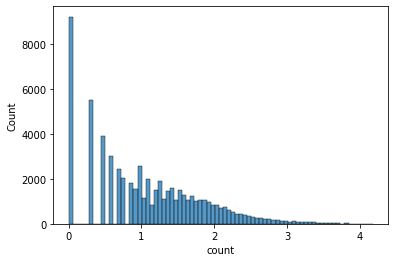

In [25]:
sns.histplot(np.log10(move_data['institution_id'].value_counts()))

In [26]:
institution_geo.dropna(subset=["city", 'country_code'], inplace=True)

ccframe = pd.read_csv('data/country-and-continent-codes-list-csv.csv')

def get_continent(country_code):
    
    if country_code == 'XK':
        con = 'EU'
    else:
        con =  str(ccframe.loc[ccframe['Two_Letter_Country_Code'] == country_code ]['Continent_Code'].values[0])
    if(con != 'nan'):
        return con
    else:
        return'NA'
        ## Pandas 好像会自动把美洲的code ”NA“ 转化成NaN，所以要特判一下


In [27]:
institution_geo['continent_code'] = institution_geo['country_code'].apply(get_continent)

In [28]:
institution_geo

,institution_id,city,region,country_code,country,latitude,longitude,continent_code
1,I4210140407,Portland,Oregon,US,United States,45.525047,-122.672940,NA
2,I4210121796,London,NaN,GB,United Kingdom,51.544495,-0.056045,EU
3,I2800206933,Vienna,NaN,AT,Austria,48.204475,16.357422,EU
4,I2802204158,Salem,Oregon,US,United States,44.886715,-123.031906,NA
5,I2998552023,Los Angeles,California,US,United States,34.046494,-118.250730,NA
...,...,...,...,...,...,...,...,...
107410,I4210167378,Seoul,NaN,KR,South Korea,37.527344,126.885635,AS
107430,I4387154366,Paris,NaN,FR,France,48.853410,2.348800,EU
107433,I4387155155,Barcelona,NaN,ES,Spain,41.388790,2.158990,EU
108139,I82930923,London,NaN,GB,United Kingdom,51.531994,-0.119311,EU


In [29]:
destinations = move_data['institution_id'].unique()
origins = move_data['prev_ins'].unique()

institution_geo = institution_geo[institution_geo['institution_id'].isin(destinations)|
                                  institution_geo['institution_id'].isin(origins)]
institution_geo

,institution_id,city,region,country_code,country,latitude,longitude,continent_code
484,I4210142806,Boone,North Carolina,US,United States,36.199036,-81.652270,NA
485,I4210103515,Rubano,NaN,IT,Italy,45.425476,11.789450,EU
487,I4210130444,Manchester,Missouri,US,United States,38.596786,-90.509660,NA
489,I4210117313,San Diego,California,US,United States,32.714620,-117.151380,NA
490,I4210124511,Philadelphia,Pennsylvania,US,United States,39.952330,-75.163790,NA
...,...,...,...,...,...,...,...,...
107143,I4210138289,Milton,Queensland,AU,Australia,-27.467762,153.006040,OC
107191,I4210143133,New Delhi,NaN,IN,India,28.624348,77.191010,AS
107348,I4210159722,Arlington,NaN,US,United States,38.881010,-77.104280,NA
107380,I4210163951,Jilin City,NaN,CN,China,43.850830,126.560280,AS


In [30]:
move_data = move_data.merge(right=institution_geo[['institution_id', 'city', 'country_code', 'continent_code']], 
                how='left', on='institution_id')
move_data

,author_id,institution_id,move_time,prev_ins,stay_time,city,country_code,continent_code
0,A5000000072,I198243066,2019-01-01,I153718931,NaT,Heredia,CR,NA
1,A5000000092,I74760111,2002-11-23,I131249849,4057 days 00:00:00,Dallas,US,NA
2,A5000000092,I16076960,2014-01-01,I74760111,2475 days 00:00:00,Islamabad,PK,AS
3,A5000000092,I131249849,2020-10-11,I16076960,NaT,Corvallis,US,NA
4,A5000000103,I4210135003,1992-05-01,I88155538,11644 days 00:00:00,Pamplona,ES,EU
...,...,...,...,...,...,...,...,...
5194553,A5098096471,I4210159963,1985-11-01,I2801942218,NaT,Copenhagen,DK,EU
5194554,A5098805673,I80043,2015-12-01,I4210147769,NaT,Paris,FR,EU
5194555,A5098902048,I75420490,2022-12-08,I135288348,NaT,New Orleans,US,NA
5194556,A9999999999,I142740786,1990-05-01,I1290463931,12382 days 00:00:00,Louisville,US,NA


In [ ]:
# move_data.to_csv('data/movements_df.csv')

In [31]:
move_data['move_time'] = pd.to_datetime(move_data['move_time'])

def get_year(time):
    return time.year

move_data['move_year'] = move_data['move_time'].apply(get_year)
move_data

,author_id,institution_id,move_time,prev_ins,stay_time,city,country_code,continent_code,move_year
0,A5000000072,I198243066,2019-01-01,I153718931,NaT,Heredia,CR,NA,2019
1,A5000000092,I74760111,2002-11-23,I131249849,4057 days 00:00:00,Dallas,US,NA,2002
2,A5000000092,I16076960,2014-01-01,I74760111,2475 days 00:00:00,Islamabad,PK,AS,2014
3,A5000000092,I131249849,2020-10-11,I16076960,NaT,Corvallis,US,NA,2020
4,A5000000103,I4210135003,1992-05-01,I88155538,11644 days 00:00:00,Pamplona,ES,EU,1992
...,...,...,...,...,...,...,...,...,...
5194553,A5098096471,I4210159963,1985-11-01,I2801942218,NaT,Copenhagen,DK,EU,1985
5194554,A5098805673,I80043,2015-12-01,I4210147769,NaT,Paris,FR,EU,2015
5194555,A5098902048,I75420490,2022-12-08,I135288348,NaT,New Orleans,US,NA,2022
5194556,A9999999999,I142740786,1990-05-01,I1290463931,12382 days 00:00:00,Louisville,US,NA,1990


# Attractiveness Estimation

## Continents

Get the attractiveness of each continent

In [32]:
continents = institution_geo['continent_code'].unique()
con_atr = pd.DataFrame(columns=continents)

for year in range(1960, 2021, 5):
    slice_data = move_data[ (move_data['move_year'] >= year) 
                           & (move_data['move_year']<(year+5))]
    con_atr_slice = dict()
    sum = len(slice_data)
    for continent in continents:
        con_atr_slice[continent] = len(slice_data[slice_data['continent_code'] == continent]) / sum
    df_slice = pd.DataFrame([con_atr_slice], index=['%d-%d'%(year, year+5)])
    con_atr = pd.concat([con_atr,df_slice])
con_atr

/var/folders/5z/8hzvmhln5p36t4tdqc9c52z40000gn/T/ipykernel_18245/750980734.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  con_atr = pd.concat([con_atr,df_slice])


,NA,EU,AF,AS,SA,OC
1960-1965,0.557949,0.305154,0.009817,0.095719,0.008454,0.022907
1965-1970,0.539753,0.308935,0.008534,0.108999,0.006470,0.027309
1970-1975,0.506425,0.325135,0.009702,0.123820,0.007717,0.027201
1975-1980,0.466169,0.345332,0.010077,0.141335,0.009196,0.027891
1980-1985,0.461174,0.345483,0.010091,0.146268,0.011253,0.025732
1985-1990,0.450180,0.352209,0.010618,0.149871,0.011967,0.025155
1990-1995,0.416154,0.371073,0.009485,0.161551,0.014184,0.027552
1995-2000,0.376720,0.384971,0.009540,0.179868,0.020784,0.028116
2000-2005,0.354365,0.383868,0.010649,0.198088,0.026225,0.026805
2005-2010,0.322020,0.378362,0.013140,0.224664,0.034405,0.027410


In [33]:
con_atr.to_csv('data/attrativeness_continent.csv')

## Countries

In [34]:
continents

array(['NA', 'EU', 'AF', 'AS', 'SA', 'OC'], dtype=object)

In [35]:
writer = pd.ExcelWriter('data/attractiveness_countries.xlsx')
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for continent in continents:
        cou_atr = attr_within_continent(move_data=move_data, 
                                        continent=continent)
        cou_atr.to_excel(writer, sheet_name=continent)
    writer.close()

## Cities

In [36]:
writer = pd.ExcelWriter('data/attractiveness_cities.xlsx')
all_countries = move_data['country_code'].unique()

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for country in all_countries:
        city_atr = attr_within_country(move_data, country)
        city_atr.to_excel(writer, sheet_name=country)
    writer.close()

# Level Distances

In [37]:
institution_id = 'I111236770'

institution_geo[institution_geo['institution_id']
                == institution_id]['continent_code'].iloc[0]

'NA'

In [ ]:
move_data['prev_ins']

In [38]:
def get_geo_info(institution_id, institution_geo):
    ins_info = institution_geo[institution_geo['institution_id'] == institution_id]
    if ins_info.empty:
        print('Mising Geo Info:', institution_id)
        return {'continent': None, 'country': None, 'city': None}
    return {
        'continent': ins_info['continent_code'].iloc[0],
        'country': ins_info['country_code'].iloc[0],
        'city': ins_info['city'].iloc[0]
    }
       
def level_distance(ins_1, ins_2, institution_geo):
    ins_1_info = get_geo_info(ins_1, institution_geo)
    ins_2_info = get_geo_info(ins_2, institution_geo)
    if ins_1_info['continent'] != ins_2_info['continent']:
        return 3
    elif ins_1_info['country'] != ins_2_info['country']:
        return 2
    elif ins_1_info['city'] != ins_2_info['city']:
        return 1
    else: return 0

In [39]:
def get_geo_info_map(institution_geo):
    geo_map = institution_geo.set_index('institution_id')[['continent_code', 'country_code', 'city']].to_dict(orient='index')
    return geo_map

def level_distance(ins_1_info, ins_2_info):
    if ins_1_info['continent_code'] != ins_2_info['continent_code']:
        return 3
    elif ins_1_info['country_code'] != ins_2_info['country_code']:
        return 2
    elif ins_1_info['city'] != ins_2_info['city']:
        return 1
    else:
        return 0

geo_map = get_geo_info_map(institution_geo)

def get_geo_info_from_map(institution_id, geo_map):
    if institution_id not in geo_map:
        print('Missing Geo Info:', institution_id)
        return {'continent_code': None, 'country_code': None, 'city': None}
    return geo_map[institution_id]



In [40]:
tqdm.pandas(desc="Processing prev_country")
move_data['prev_country'] = move_data['prev_ins'].progress_apply(lambda x: get_geo_info_from_map(x, geo_map)['country_code'])

tqdm.pandas(desc="Calculating level_distance")
move_data['level_distance'] = move_data.progress_apply(
    lambda x: level_distance(get_geo_info_from_map(x['institution_id'], geo_map),
                             get_geo_info_from_map(x['prev_ins'], geo_map)), axis=1)

Calculating level_distance: 100%|██████████| 5194558/5194558 [00:54<00:00, 95408.18it/s] 


In [41]:
move_data.to_csv('data/movement_df_with_ld.csv')

In [42]:
move_data

,author_id,institution_id,move_time,prev_ins,stay_time,city,country_code,continent_code,move_year,prev_country,level_distance
0,A5000000072,I198243066,2019-01-01,I153718931,NaT,Heredia,CR,NA,2019,CA,2
1,A5000000092,I74760111,2002-11-23,I131249849,4057 days 00:00:00,Dallas,US,NA,2002,US,1
2,A5000000092,I16076960,2014-01-01,I74760111,2475 days 00:00:00,Islamabad,PK,AS,2014,US,3
3,A5000000092,I131249849,2020-10-11,I16076960,NaT,Corvallis,US,NA,2020,PK,3
4,A5000000103,I4210135003,1992-05-01,I88155538,11644 days 00:00:00,Pamplona,ES,EU,1992,ES,0
...,...,...,...,...,...,...,...,...,...,...,...
5194553,A5098096471,I4210159963,1985-11-01,I2801942218,NaT,Copenhagen,DK,EU,1985,DK,1
5194554,A5098805673,I80043,2015-12-01,I4210147769,NaT,Paris,FR,EU,2015,ES,2
5194555,A5098902048,I75420490,2022-12-08,I135288348,NaT,New Orleans,US,NA,2022,US,1
5194556,A9999999999,I142740786,1990-05-01,I1290463931,12382 days 00:00:00,Louisville,US,NA,1990,US,1


In [43]:
ld_col = ['P(d=0)', 'P(d=1)', 'P(d=2)', 'P(d=3)']

writer = pd.ExcelWriter('data/level_distances.xlsx')

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for country in all_countries:
        ld_df = pd.DataFrame(columns=ld_col)
        country_movement = move_data[move_data['prev_country']==country]
        for year in range(1960, 2021, 5):
            slice_data = country_movement[ (country_movement['move_year'] >= year) 
                                & (country_movement['move_year']<(year+5))]
            sum = len(slice_data)
            pld = [len(slice_data[slice_data['level_distance'] == i])/sum if sum !=0 else 0
                for i in range(4)]
            pld = pd.DataFrame([pld], columns=ld_col, 
                            index=['%d-%d'%(year, year+5)])
            ld_df = pd.concat([ld_df, pld], axis=0)
        ld_df.to_excel(writer, sheet_name = country)
    writer.close()        
